In [1]:
import pandas
import missingno as msno
import numpy as np
from scipy import stats

### Missing value analysis

Missing Completely at Random:  There is no pattern in the missing data on any variables. This is the best you can hope for.

Missing at Random: There is a pattern in the missing data but not on your primary dependent variables such as likelihood to recommend or SUS Scores.

Missing Not at Random: There is a pattern in the missing data that affect your primary dependent variables. For example, lower-income participants are less likely to respond and thus affect your conclusions about income and likelihood to recommend. 

Missing not at random is your worst-case scenario. Proceed with caution.

In [2]:
%matplotlib inline
full_training_set = pandas.read_csv('data/training_set_VU_DM_2014.csv')
print("Dataset loaded")

Dataset loaded


After loading the dataset a plot can be shown analyse the missing values. With the help of missingno a interesting plot is made.

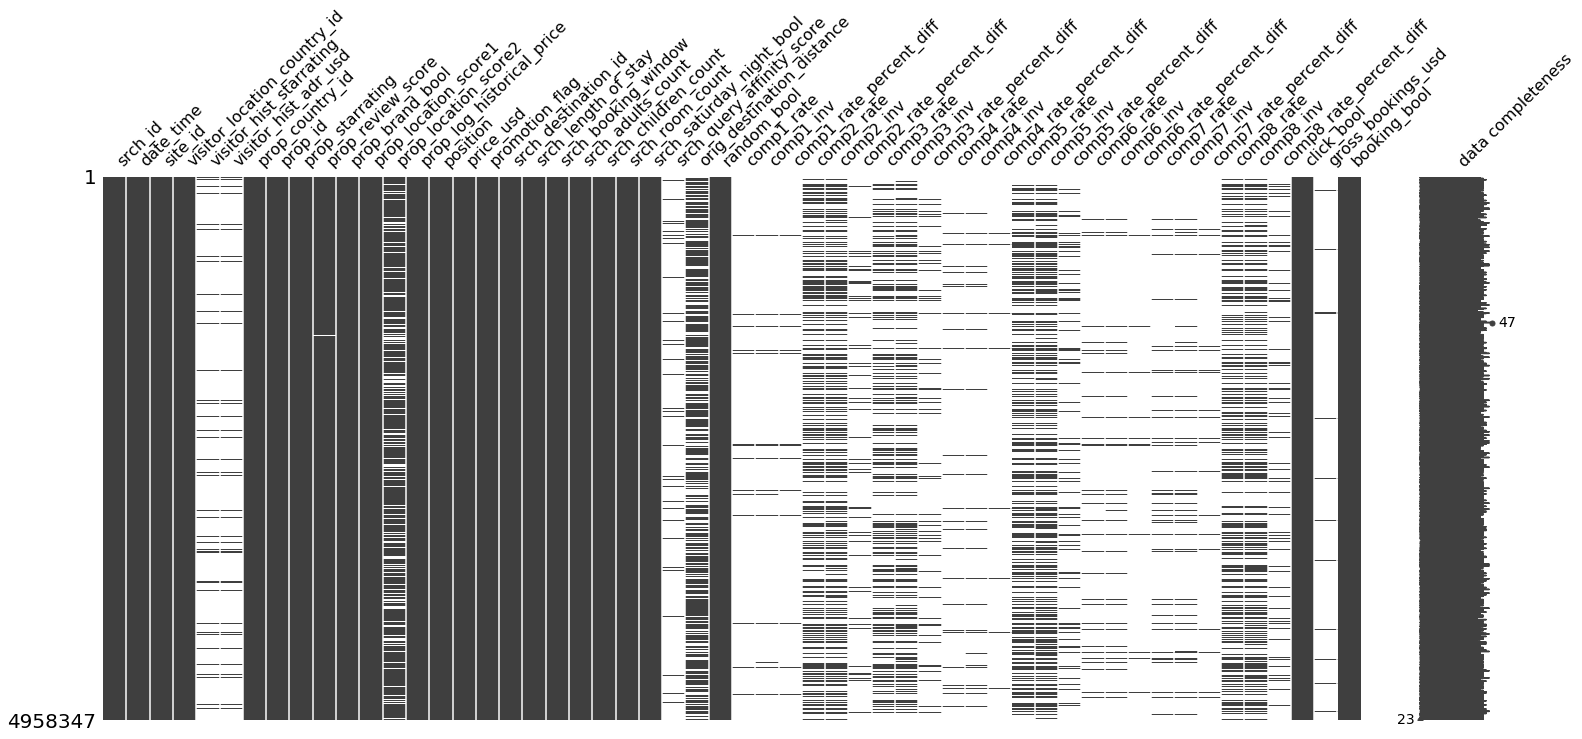

In [4]:
# list_missing_columns = ["srch_id"]
# for index_val, val in zip(list_of_missing_data.index,list_of_missing_data):
#     if val > 0 and index_val != "gross_bookings_usd":
#         list_missing_columns.append(index_val)


msno.matrix(full_training_set, labels=list(full_training_set))

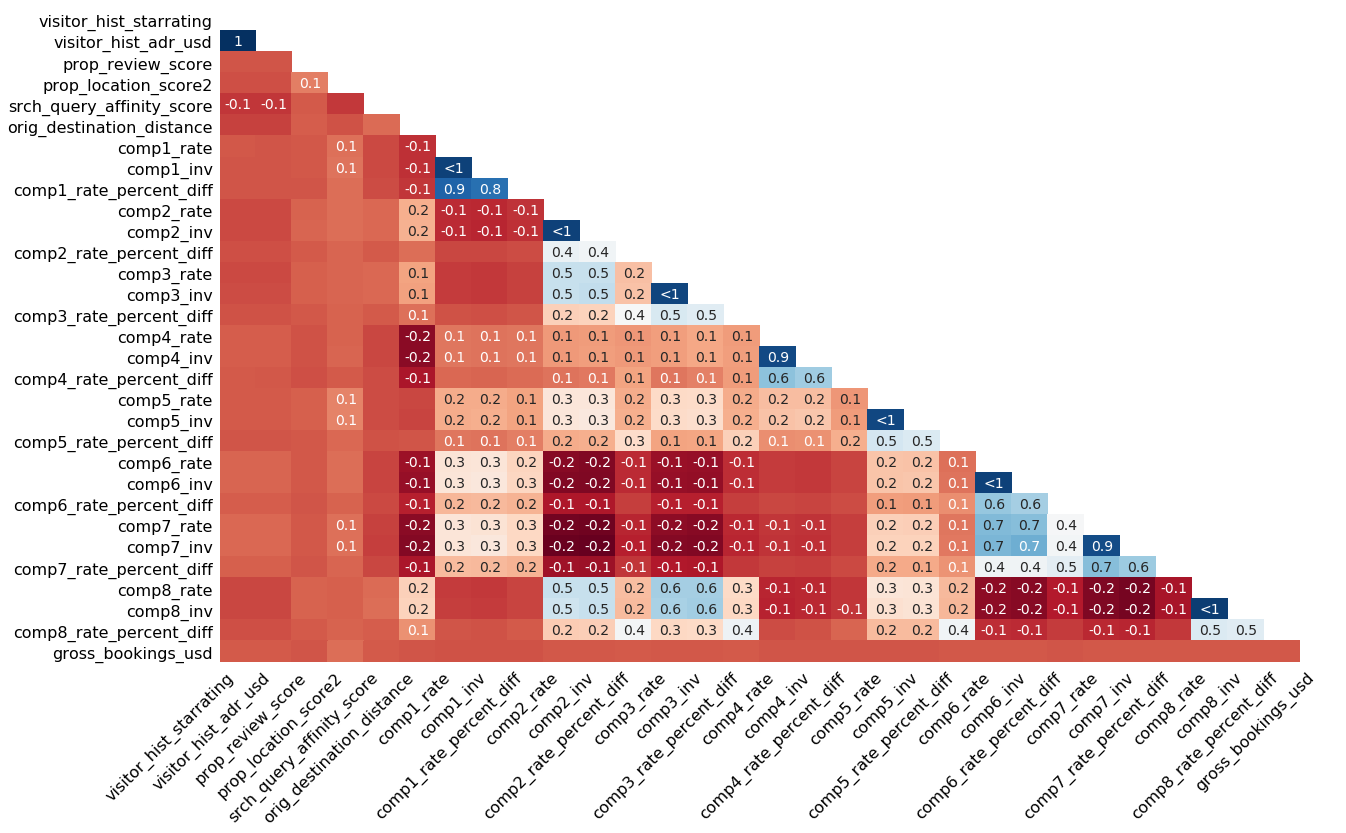

In [5]:
msno.heatmap(full_training_set)

In [6]:
print(full_training_set.describe())

            srch_id       site_id  visitor_location_country_id  \
count  4.958347e+06  4.958347e+06                 4.958347e+06   
mean   1.663666e+05  9.953133e+00                 1.753405e+02   
std    9.611223e+04  7.646890e+00                 6.591625e+01   
min    1.000000e+00  1.000000e+00                 1.000000e+00   
25%    8.293600e+04  5.000000e+00                 1.000000e+02   
50%    1.665070e+05  5.000000e+00                 2.190000e+02   
75%    2.497240e+05  1.400000e+01                 2.190000e+02   
max    3.327850e+05  3.400000e+01                 2.310000e+02   

       visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
count            251866.000000         252988.000000     4.958347e+06   
mean                  3.374334            176.022659     1.739739e+02   
std                   0.692519            107.254493     6.834525e+01   
min                   1.410000              0.000000     1.000000e+00   
25%                   2.920000          

Counting the amount of missing values in the dataset gives an insight if values should be removed Entirely or not.

In [6]:
list_of_missing_data = full_training_set.isnull().sum()
print(list_of_missing_data)
i = 0
for index_val, val in zip(list_of_missing_data.index,list_of_missing_data):
    if val > 0:
        i += 1
print("Amount of columns with missing values: "+ str(i))

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

T-tests are used to figure out if the data is completely at random and thus the entire column can be removed. When there is a definitive correlation between the to predict values click_bool and/or booking_bool the missing values have to be filled in.



In [14]:
print("average for clicking " +str(full_training_set['click_bool'].mean()))


print("average for booking " +str(full_training_set['booking_bool'].mean()))


average for clicking 0.04474858254172207
average for booking 0.027910511305481445


In [17]:
for index_val, val in zip(list_of_missing_data.index,list_of_missing_data):
    # If there is missing data we can do a t-test.
    if val > 0 and index_val != "gross_bookings_usd":
        print(index_val)
        cat1 = full_training_set[full_training_set[index_val].isnull()==True]['click_bool']
        cat2 = full_training_set[full_training_set[index_val].isnull()==False]['click_bool']
        cat1mean = cat1.mean()
        cat2mean = cat2.mean()

        if cat1mean > cat2mean:
            print("more likely to click with NULL " + str(cat1mean) + " > " + str(cat2mean))
        else:
            print("Less likely to click with NULL " + str(cat1mean) + " < " + str(cat2mean))        
#         print("average for null values: "+ str(cat1.mean()))
#         print("average for not null values: "+ str(cat2.mean()))
            
#         t2, p2 = stats.ttest_ind(cat1,cat2,equal_var=False)
#         print("t-value click boolean = " + str(t2))
#         print("p-value click boolean = " + str(p2))
        
        cat1 = full_training_set[full_training_set[index_val].isnull()==True]['booking_bool']
        cat2 = full_training_set[full_training_set[index_val].isnull()==False]['booking_bool']
        cat1mean = cat1.mean()
        cat2mean = cat2.mean()
        if cat1mean > cat2mean:
            print("more likely to book with NULL " + str(cat1mean) + " > " + str(cat2mean))
        else:
            print("Less likely to book with NULL " + str(cat1mean) + " < " + str(cat2mean))   
#         print("average for null values: "+ str(cat1mean))
#         print("average for not null values: "+ str(cat1mean))
#         t2, p2 = stats.ttest_ind(cat1,cat2,equal_var=False)
#         print("t-value booking boolean = " + str(t2))
#         print("p-value booking boolean = " + str(p2))

visitor_hist_starrating
more likely to click with NULL 0.0447759164437294 > 0.04423780899367124
Less likely to book with NULL 0.02747318006808059 < 0.03608267888480383
visitor_hist_adr_usd
more likely to click with NULL 0.044773841910893515 > 0.04427878002118678
Less likely to book with NULL 0.0274699550023707 < 0.0361044792638386
prop_review_score
Less likely to click with NULL 0.03476371537208039 < 0.0447634338473794
Less likely to book with NULL 0.015752308527973928 < 0.027928595190086496
prop_location_score2
Less likely to click with NULL 0.024469252018621577 < 0.050465111288808505
Less likely to book with NULL 0.013274660933940356 < 0.03203620269808757
srch_query_affinity_score
more likely to click with NULL 0.04477928075362302 > 0.04429972968374889
Less likely to book with NULL 0.027473954096809246 < 0.034293617637977857
orig_destination_distance
more likely to click with NULL 0.04636636061356577 > 0.04397228527129007
Less likely to book with NULL 0.02779543495324615 < 0.02796573

In [45]:
for index_val, val in zip(list_of_missing_data.index,list_of_missing_data):
    # If there is missing data we can do a t-test.
    if val > 0 and index_val != "gross_bookings_usd":
        print(index_val)
        cat2 = full_training_set[full_training_set[index_val].isnull()==False][index_val]

        print("new average for null values: "+ str(cat2.mean()))
        print("min for null values: "+ str(cat2.min()))
        print("max for null values: "+ str(cat2.max()))
        

visitor_hist_starrating
new average for null values: 3.374334050646105
1.41
5.0
visitor_hist_adr_usd
new average for null values: 176.02265913798385
0.0
1958.7
prop_review_score
new average for null values: 3.7777767566562033
0.0
5.0
prop_location_score2
new average for null values: 0.13038516788660134
0.0
1.0
srch_query_affinity_score
new average for null values: -24.146418262413754
-326.5675
-2.4941
orig_destination_distance
new average for null values: 1301.2344059971783
0.01
11666.64
comp1_rate
new average for null values: 0.47978820978904363
-1.0
1.0
comp1_inv
new average for null values: 0.031059208545913444
-1.0
1.0
comp1_rate_percent_diff
new average for null values: 244.22991560689968
2.0
30389.0
comp2_rate
new average for null values: 0.04418987371781701
-1.0
1.0
comp2_inv
new average for null values: 0.03931005896438431
-1.0
1.0
comp2_rate_percent_diff
new average for null values: 18.49073238433908
2.0
168893.0
comp3_rate
new average for null values: 0.017290104595747344
-1.

In [24]:


full_training_set['max_rate_percent_diff'] = full_training_set[['comp1_rate_percent_diff', 'comp2_rate_percent_diff', 
                                                                'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 
                                                                'comp5_rate_percent_diff', 'comp6_rate_percent_diff', 
                                                                'comp7_rate_percent_diff', 'comp8_rate_percent_diff'] 
                                                              ].max(axis=0)

full_training_set['min_rate_percent_diff'] = full_training_set[['comp1_rate_percent_diff', 'comp2_rate_percent_diff', 
                                                                'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 
                                                                'comp5_rate_percent_diff', 'comp6_rate_percent_diff', 
                                                                'comp7_rate_percent_diff', 'comp8_rate_percent_diff'] 
                                                              ].min(axis=0)

full_training_set['count_available'] = 0.0
full_training_set['count_higher_rate'] = 0.0
full_training_set['count_lower_rate'] = 0.0
for elem in range(1,9):
    full_training_set['count_lower_rate'] += np.where(full_training_set['comp'+str(elem)+'_rate'] == -1, 1, 0)
    full_training_set['count_higher_rate'] += np.where(full_training_set['comp'+str(elem)+'_rate'] == 1, 1, 0)
    full_training_set['count_available'] += np.where(full_training_set['comp'+str(elem)+'_inv'] == 1, 1, 0)

0     0.0
1     1.0
2     0.0
3     1.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    1.0
22    1.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
     ... 
70    3.0
71    0.0
72    0.0
73    0.0
74    0.0
75    0.0
76    0.0
77    1.0
78    3.0
79    1.0
80    0.0
81    3.0
82    0.0
83    1.0
84    0.0
85    0.0
86    0.0
87    1.0
88    0.0
89    0.0
90    0.0
91    0.0
92    1.0
93    0.0
94    0.0
95    1.0
96    0.0
97    1.0
98    0.0
99    0.0
Name: count_available, Length: 100, dtype: float64


In [25]:
cat2 = full_training_set[full_training_set['count_available'].isnull()==False]['count_available']

print(full_training_set['count_available'].head(5))
print("min for null values: "+ str(cat2.min()))
print("max for null values: "+ str(cat2.max()))

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: count_available, dtype: float64
min for null values: 0.0
max for null values: 6.0
